In [1]:
import numpy as np
from qiskit import *

In [2]:
circ=QuantumCircuit(3)

In [3]:
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)

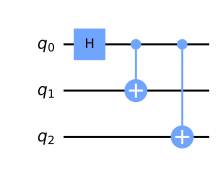

In [4]:
circ.draw('mpl')

In [5]:
from qiskit.circuit.library import CDKMRippleCarryAdder
from qiskit_aer.library import save_statevector

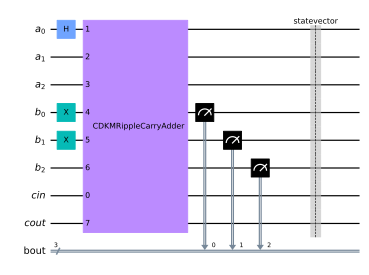

In [6]:
a = QuantumRegister(3,name='a')
b = QuantumRegister(3,name='b')
cin=QuantumRegister(1,name='cin')
cout=QuantumRegister(1,name='cout')
bout=ClassicalRegister(3,name='bout')
qc=QuantumCircuit(a,b,cin,cout,bout)
qc.h(a[0])
qc.x(b[0])
qc.x(b[1])
qc.append(CDKMRippleCarryAdder(num_state_qubits=3), [cin[0]] + a[:] + b[:] + [cout[0]])
qc.measure(b, bout)
qc.save_statevector()
qc.draw(scale=0.6)

In [7]:
from qiskit_aer import Aer
sim = Aer.get_backend('aer_simulator')
tr_circ = transpile(qc, sim)
job = sim.run(tr_circ, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'100': 491, '011': 533}


In [8]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

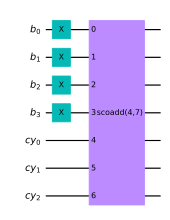

In [10]:
import tests.arithmetic.test_scoadder as tc

qc = tc.build_scoadder_circ_for(4, 7, 15, True, True)

qc.draw(scale=0.6)


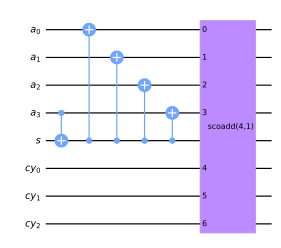

In [11]:
import tests.arithmetic.test_absolute as tc

qc = tc.build_absolute_circ_for(4, 0)

qc.draw(scale=0.6)


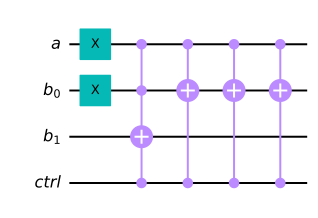

In [12]:
import crsq.arithmetic as ari
from qiskit import QuantumCircuit, QuantumRegister

m=1
n=1
ar = QuantumRegister(m, name='a')
br = QuantumRegister(n+1, name='b')
cr = QuantumRegister(n-1, name='c')
cbit = QuantumRegister(1, name="ctrl")
qc = QuantumCircuit(ar, br, cr, cbit)
aval=1
bval=1
ari.set_value(qc, ar, aval)
ari.set_value(qc, br, bval)
ari.controlled_unsigned_adderv(qc,cbit, ar,br,cr,use_gates=False)

#ari.unsigned_adderv_gate(m,n).circuit().draw()
# qc.append(, ar[:] + br[:] + cr[:])

qc.draw()